In [1]:
import os
import time
import torch
import sys
import numpy as np
import torch.optim as optim
import itertools
import shutil
from shutil import copyfile
from torchvision import transforms as T
%matplotlib notebook
from models import SpecialFuseNetModel
from data_manager import rgbd_gradients_dataset, rgbd_gradients_dataloader
from train import FuseNetTrainer
from functions import make_ckpt_fname
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
CWD                      = os.getcwd()

Using device: cuda


Sets all hyper-parameters options, and creates all of their combinations.

In [2]:
hyperparameters_filename = 'hyperparameters'
overfit_data_dir_path    = 'data/nyuv2_overfit'
normal_data_dir_path     = 'data/nyuv2'

# OVERFITTING_TRAINING     = True
OVERFITTING_TRAINING     = False

IMAGE_SIZE              = [(224,224)] # [(448, 448)]
TRAIN_TEST_RATIO        = [0.9]
BATCH_SIZE              = [4, 8] # [4,16,32,64]
NUM_WORKERS             = [4]
BETAS                   = [(0.9)] # [(0.9, 0.99)]
LR                      = [0.001, 0.01]
MOMENTUM                = [0.9]
WEIGHT_DECAY            = [0.0005]
STEP_SIZE               = [1000]
GAMMA                   = [0.1]
NUM_EPOCHS              = [200]

constant_index = -1

In [3]:
if OVERFITTING_TRAINING:
    DATASET_DIR          = os.path.join(CWD, overfit_data_dir_path)
    NUM_EPOCHS           = [50] # Doesn't need more in Overfitting
    TRAIN_TEST_RATIO     = [0.5] # <-- MUST USE 0.5 FOR OVERFITTING
else:
    DATASET_DIR          = os.path.join(CWD, normal_data_dir_path)

Make sure that all stochastic elements renoved from the model in overfit mode 

Loops over all the combinations, trains, and saves both the models, and their hyper-parameters files.

Current Hyper-Parameters:
IMAGE_SIZE=(224, 224)
TRAIN_TEST_RATIO=0.9
BATCH_SIZE=4
NUM_WORKERS=4
BETAS=0.9
LR=0.001
MOMENTUM=0.9
WEIGHT_DECAY=0.0005
STEP_SIZE=1000
GAMMA=0.1
NUM_EPOCHS=200

[I] - device=cuda
    - seed=42
    - dropout_p=0
    - optimizer=None
    - scheduler=None
[I] - Init SpecialFuseNet
    - warm start=True
    - BN momentum=0.1
    - dropout_p=0
[I] - Initialize Net.
    - Init type=xavier
    - Init gain=0.02

[I] - default optimizer set: SGD(lr=0.001,momentum=0.9,weight_decay=0.0005)
[I] - default scheduler set: StepSR(step_size=1000,gamma=0.1)
[I] - device=cuda
    - seed=42
    - dropout_p=0.4
    - optimizer=None
    - scheduler=None
[I] - Init SpecialFuseNet
    - warm start=True
    - BN momentum=0.1
    - dropout_p=0.4
[I] - Initialize Net.
    - Init type=xavier
    - Init gain=0.02

[I] - default optimizer set: SGD(lr=0.001,momentum=0.9,weight_decay=0.0005)
[I] - default scheduler set: StepSR(step_size=1000,gamma=0.1)
--- EPOCH 1/200 ---
test_batch:   0%|

<IPython.core.display.Javascript object>


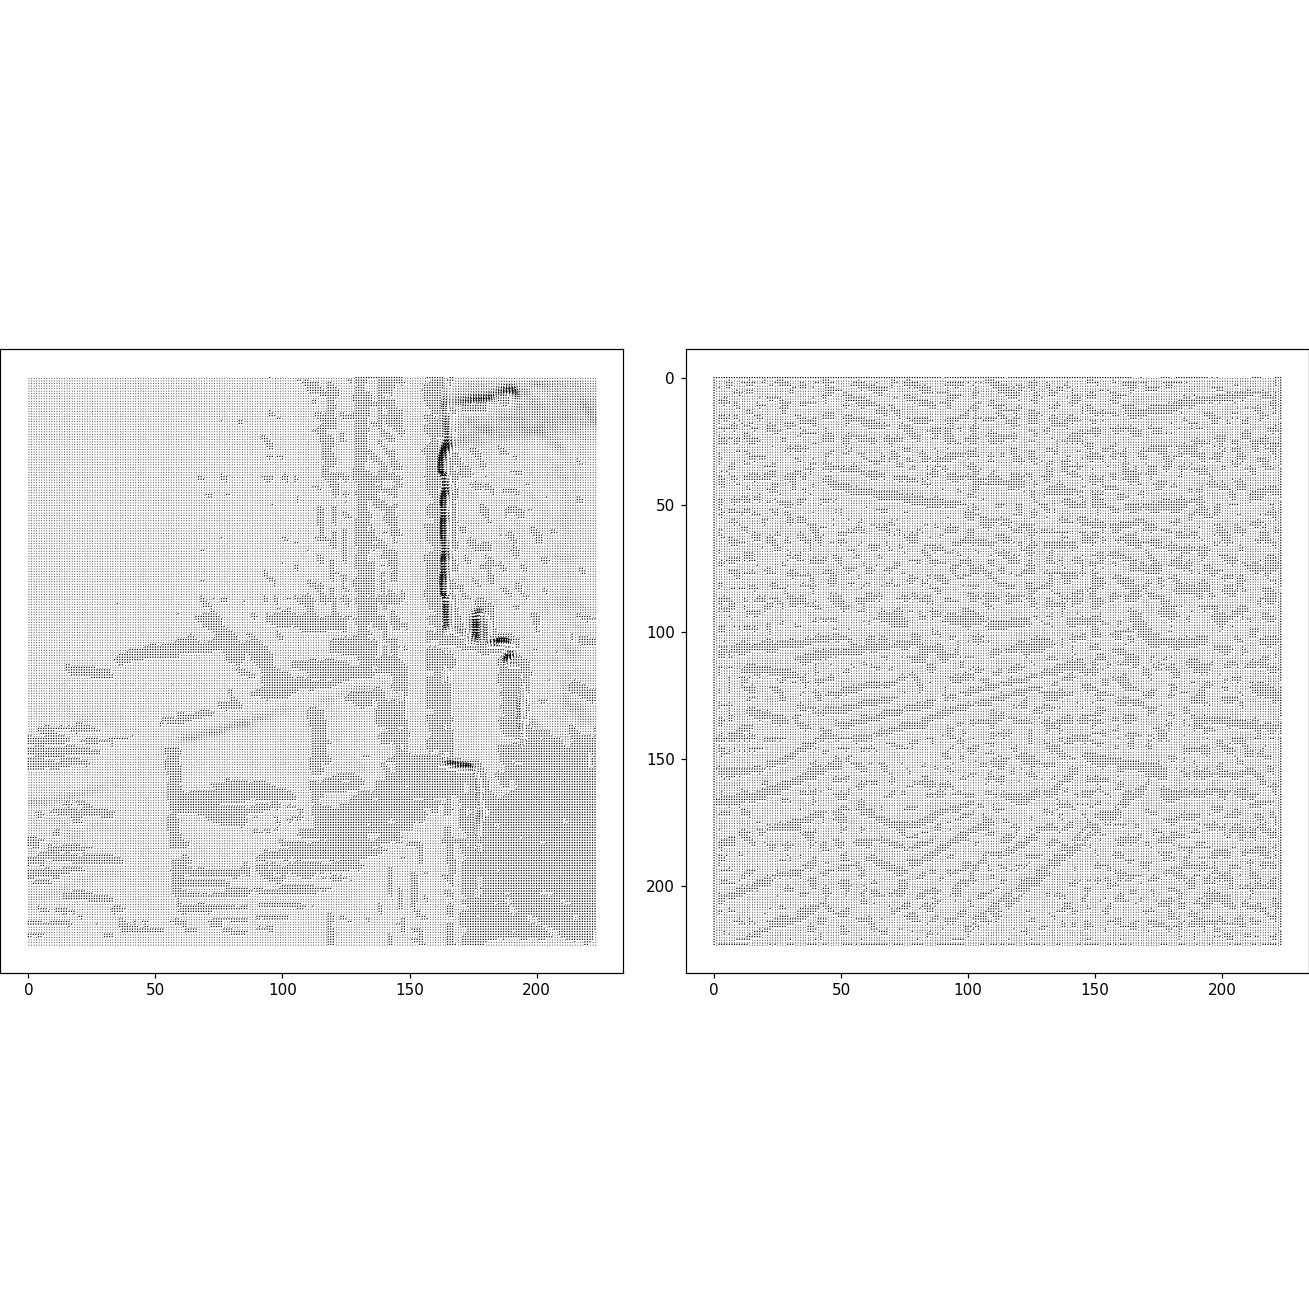

test_batch (Avg. Loss 0.060: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.63it/s]
--- EPOCH 2/200 ---
test_batch (Avg. Loss 0.060: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.69it/s]
--- EPOCH 3/200 ---
test_batch (Avg. Loss 0.050: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.65it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=4,betas=0.9,lr=0.001,momentum=0.9.pt at epoch 3
--- EPOCH 4/200 ---
test_batch (Avg. Loss 0.052: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.54it/s]
--- EPOCH 5/200 ---
test_batch (Avg. Loss 0.048: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.41it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=4,betas=0.9,lr=0

test_batch (Avg. Loss 0.046: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.63it/s]
--- EPOCH 31/200 ---
test_batch (Avg. Loss 0.045: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.61it/s]
--- EPOCH 32/200 ---
test_batch (Avg. Loss 0.043: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.56it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=4,betas=0.9,lr=0.001,momentum=0.9.pt at epoch 32
--- EPOCH 33/200 ---
test_batch (Avg. Loss 0.051: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.65it/s]
--- EPOCH 34/200 ---
test_batch (Avg. Loss 0.047: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.34it/s]
--- EPOCH 35/200 ---
test_batch (Avg. Loss 0.046: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.60it/s

test_batch (Avg. Loss 0.044: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.54it/s]
--- EPOCH 61/200 ---
test_batch (Avg. Loss 0.042: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.60it/s]
--- EPOCH 62/200 ---
test_batch (Avg. Loss 0.041: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.63it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=4,betas=0.9,lr=0.001,momentum=0.9.pt at epoch 62
--- EPOCH 63/200 ---
test_batch (Avg. Loss 0.047: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.45it/s]
--- EPOCH 64/200 ---
test_batch (Avg. Loss 0.048: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.62it/s]
--- EPOCH 65/200 ---
test_batch (Avg. Loss 0.041: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.50it/s

test_batch (Avg. Loss 0.042: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.76it/s]
--- EPOCH 89/200 ---
test_batch (Avg. Loss 0.044: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
--- EPOCH 90/200 ---
test_batch (Avg. Loss 0.042: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.74it/s]
--- EPOCH 91/200 ---
test_batch (Avg. Loss 0.043: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.77it/s]
--- EPOCH 92/200 ---
test_batch (Avg. Loss 0.045: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.78it/s]
--- EPOCH 93/200 ---
test_batch (Avg. Loss 0.041: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.76it/s]
--- EPOCH 94/200 ---
test_batch (Avg. Loss 0.039: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
--- EPOCH 95/200 ---
test_batch (A

<IPython.core.display.Javascript object>


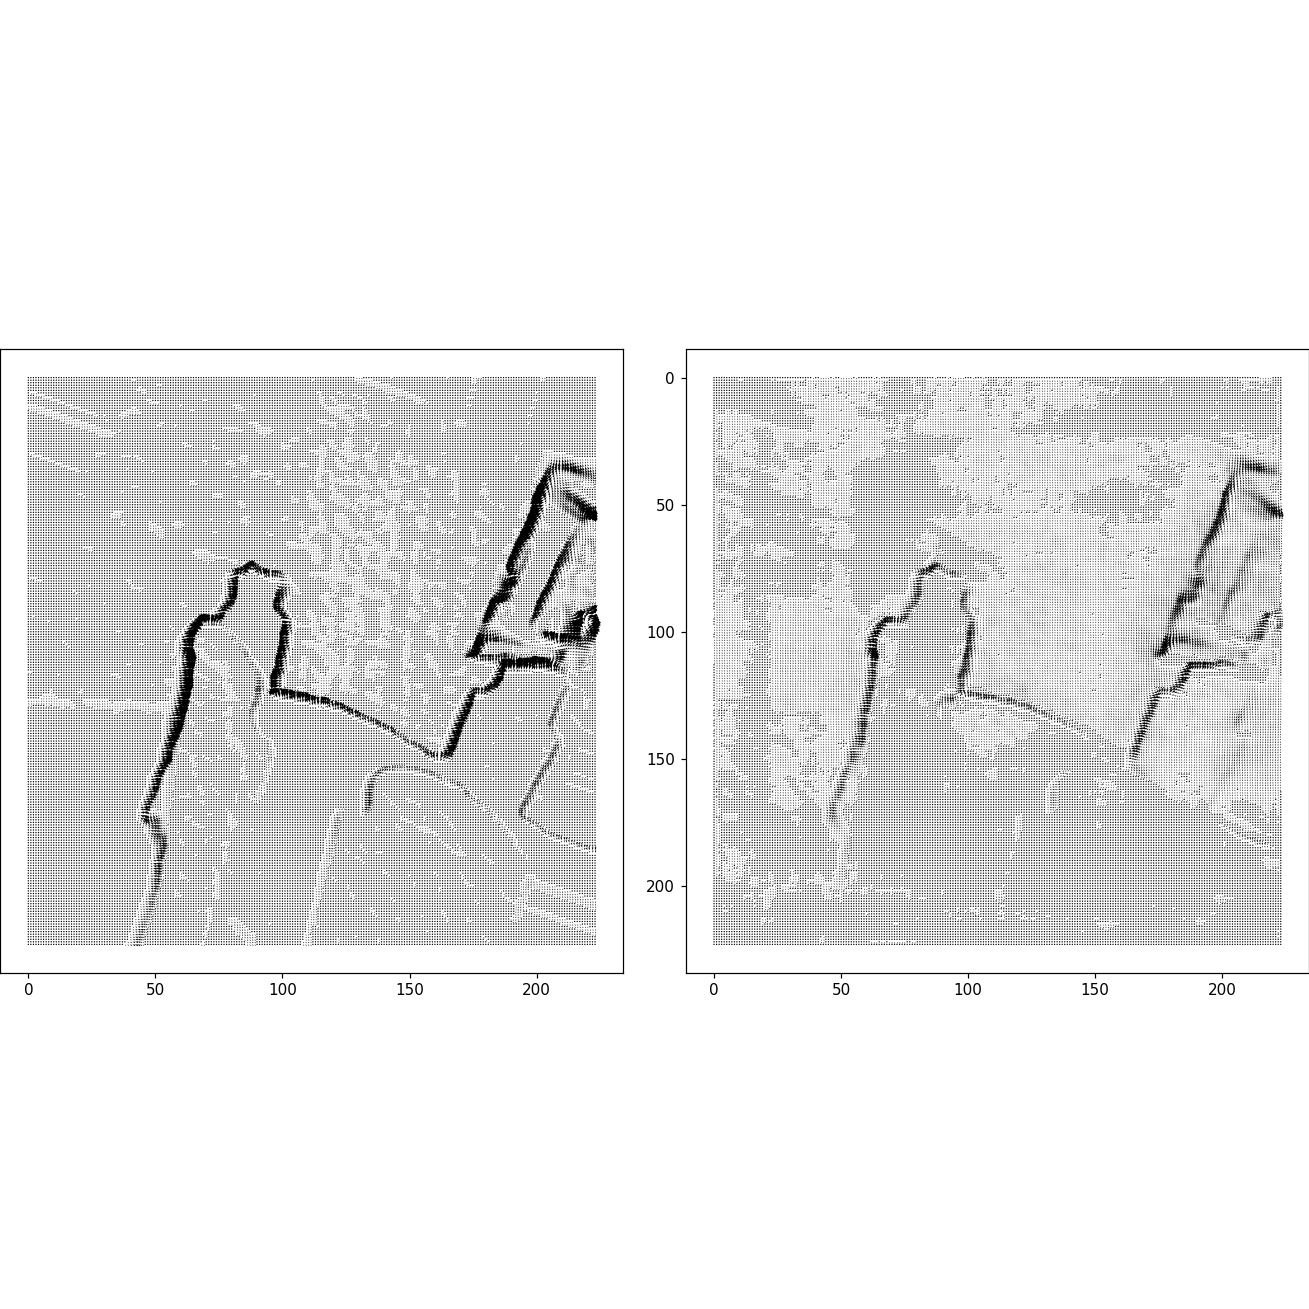

test_batch (Avg. Loss 0.036: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.75it/s]
--- EPOCH 113/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
--- EPOCH 114/200 ---
test_batch (Avg. Loss 0.036: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.76it/s]
--- EPOCH 115/200 ---
test_batch (Avg. Loss 0.039: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.76it/s]
--- EPOCH 116/200 ---
test_batch (Avg. Loss 0.035: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.73it/s]
--- EPOCH 117/200 ---
test_batch (Avg. Loss 0.034: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=4,betas=0.9,lr=0.001,momentum=0.9.pt at ep

test_batch (Avg. Loss 0.035: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
--- EPOCH 141/200 ---
test_batch (Avg. Loss 0.033: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.80it/s]
--- EPOCH 142/200 ---
test_batch (Avg. Loss 0.034: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.70it/s]
--- EPOCH 143/200 ---
test_batch (Avg. Loss 0.036: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
--- EPOCH 144/200 ---
test_batch (Avg. Loss 0.036: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
--- EPOCH 145/200 ---
test_batch (Avg. Loss 0.036: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.81it/s]
--- EPOCH 146/200 ---
test_batch (Avg. Loss 0.032: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.77it/s]
--- EPOCH 147/200 ---
test_b

test_batch (Avg. Loss 0.033: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.80it/s]
--- EPOCH 171/200 ---
test_batch (Avg. Loss 0.035: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.76it/s]
--- EPOCH 172/200 ---
test_batch (Avg. Loss 0.035: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.80it/s]
--- EPOCH 173/200 ---
test_batch (Avg. Loss 0.034: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.81it/s]
--- EPOCH 174/200 ---
test_batch (Avg. Loss 0.035: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
--- EPOCH 175/200 ---
test_batch (Avg. Loss 0.030: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
--- EPOCH 176/200 ---
test_batch (Avg. Loss 0.032: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.80it/s]
--- EPOCH 177/200 ---
test_b

[I] - device=cuda
    - seed=42
    - dropout_p=0
    - optimizer=None
    - scheduler=None
[I] - Init SpecialFuseNet
    - warm start=True
    - BN momentum=0.1
    - dropout_p=0
[I] - Initialize Net.
    - Init type=xavier
    - Init gain=0.02

[I] - default optimizer set: SGD(lr=0.001,momentum=0.9,weight_decay=0.0005)
[I] - default scheduler set: StepSR(step_size=1000,gamma=0.1)
[I] - device=cuda
    - seed=42
    - dropout_p=0.4
    - optimizer=None
    - scheduler=None
[I] - Init SpecialFuseNet
    - warm start=True
    - BN momentum=0.1
    - dropout_p=0.4
[I] - Initialize Net.
    - Init type=xavier
    - Init gain=0.02

[I] - default optimizer set: SGD(lr=0.001,momentum=0.9,weight_decay=0.0005)
[I] - default scheduler set: StepSR(step_size=1000,gamma=0.1)
--- EPOCH 1/200 ---
test_batch:   0%|                                                                               | 0/36 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


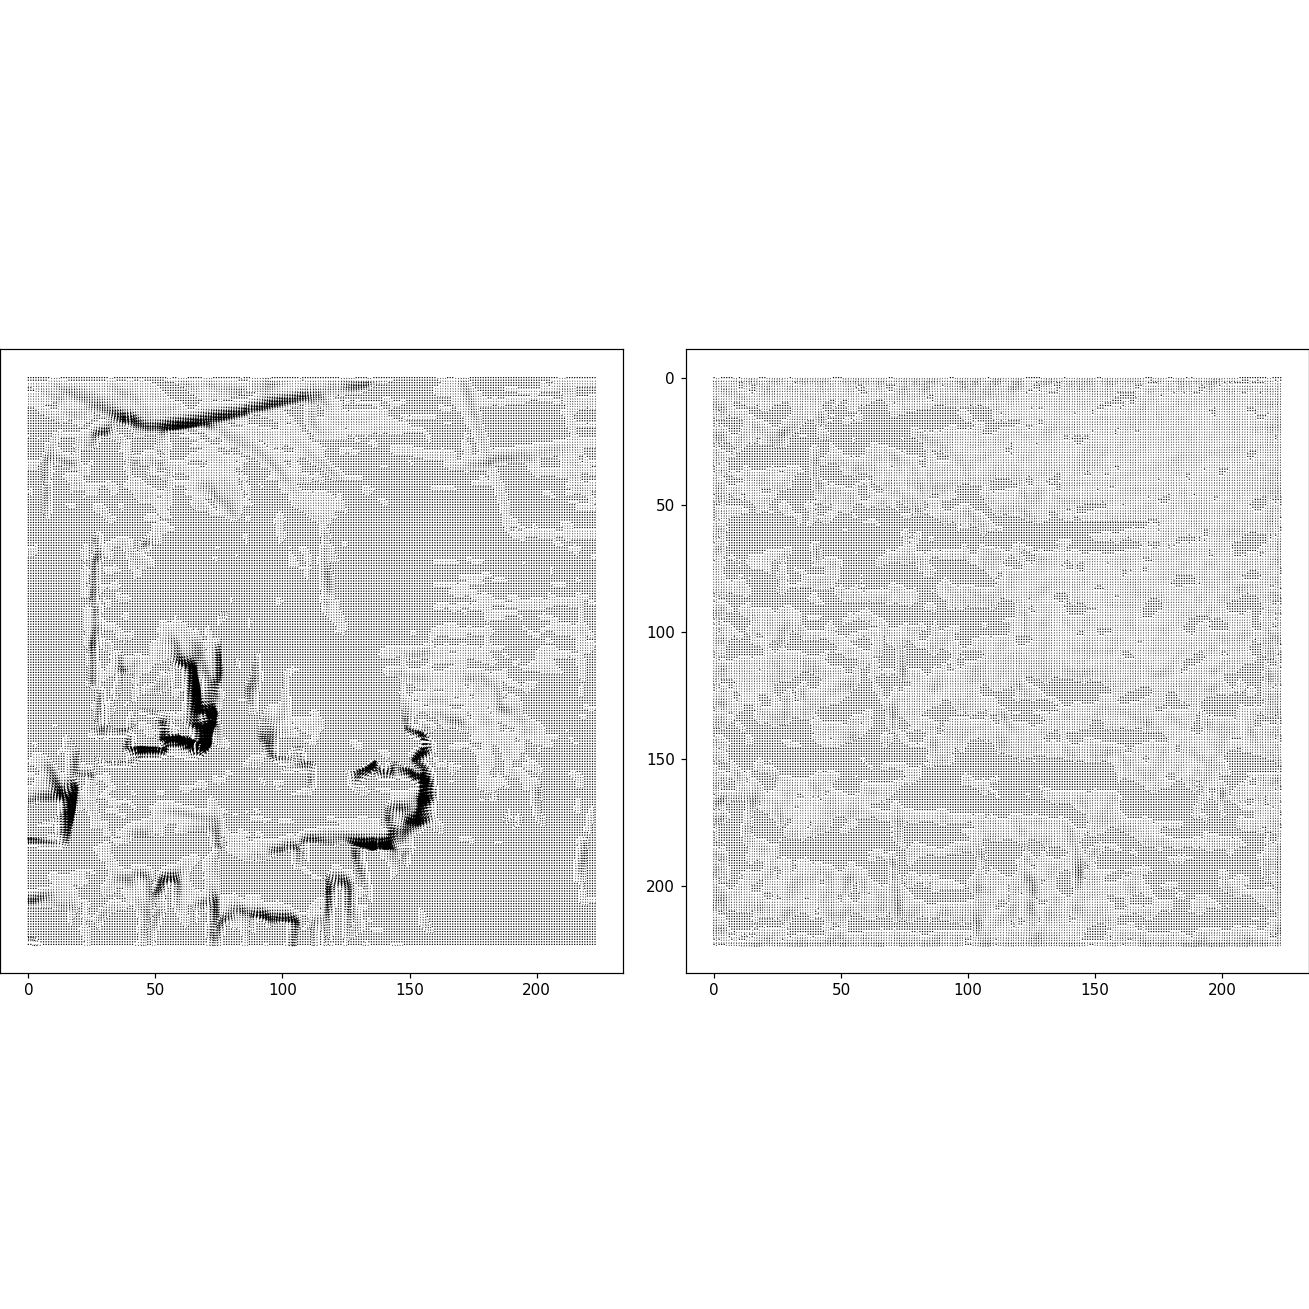

test_batch (Avg. Loss 0.067: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.77it/s]
--- EPOCH 2/200 ---
test_batch (Avg. Loss 0.056: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=4,betas=0.9,lr=0.01,momentum=0.9.pt at epoch 2
--- EPOCH 3/200 ---
test_batch (Avg. Loss 0.056: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=4,betas=0.9,lr=0.01,momentum=0.9.pt at epoch 3
--- EPOCH 4/200 ---
test_batch (Avg. Loss 0.055: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.78it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=2

test_batch (Avg. Loss 0.050: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.75it/s]
--- EPOCH 28/200 ---
test_batch (Avg. Loss 0.048: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
--- EPOCH 29/200 ---
test_batch (Avg. Loss 0.050: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.80it/s]
--- EPOCH 30/200 ---
test_batch (Avg. Loss 0.047: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.75it/s]
--- EPOCH 31/200 ---
test_batch (Avg. Loss 0.049: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.78it/s]
--- EPOCH 32/200 ---
test_batch (Avg. Loss 0.045: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.80it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=4,betas=0.9,lr=0.01,momentum=0.9.pt at epoch 32

test_batch (Avg. Loss 0.046: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.80it/s]
--- EPOCH 57/200 ---
test_batch (Avg. Loss 0.041: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.75it/s]
--- EPOCH 58/200 ---
test_batch (Avg. Loss 0.042: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.77it/s]
--- EPOCH 59/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.78it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=4,betas=0.9,lr=0.01,momentum=0.9.pt at epoch 59
--- EPOCH 60/200 ---
test_batch (Avg. Loss 0.042: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.77it/s]
--- EPOCH 61/200 ---
test_batch (Avg. Loss 0.044: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]

test_batch (Avg. Loss 0.037: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.76it/s]
--- EPOCH 86/200 ---
test_batch (Avg. Loss 0.045: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.77it/s]
--- EPOCH 87/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.80it/s]
--- EPOCH 88/200 ---
test_batch (Avg. Loss 0.039: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
--- EPOCH 89/200 ---
test_batch (Avg. Loss 0.042: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.80it/s]
--- EPOCH 90/200 ---
test_batch (Avg. Loss 0.044: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.75it/s]
--- EPOCH 91/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.77it/s]
--- EPOCH 92/200 ---
test_batch (A

<IPython.core.display.Javascript object>


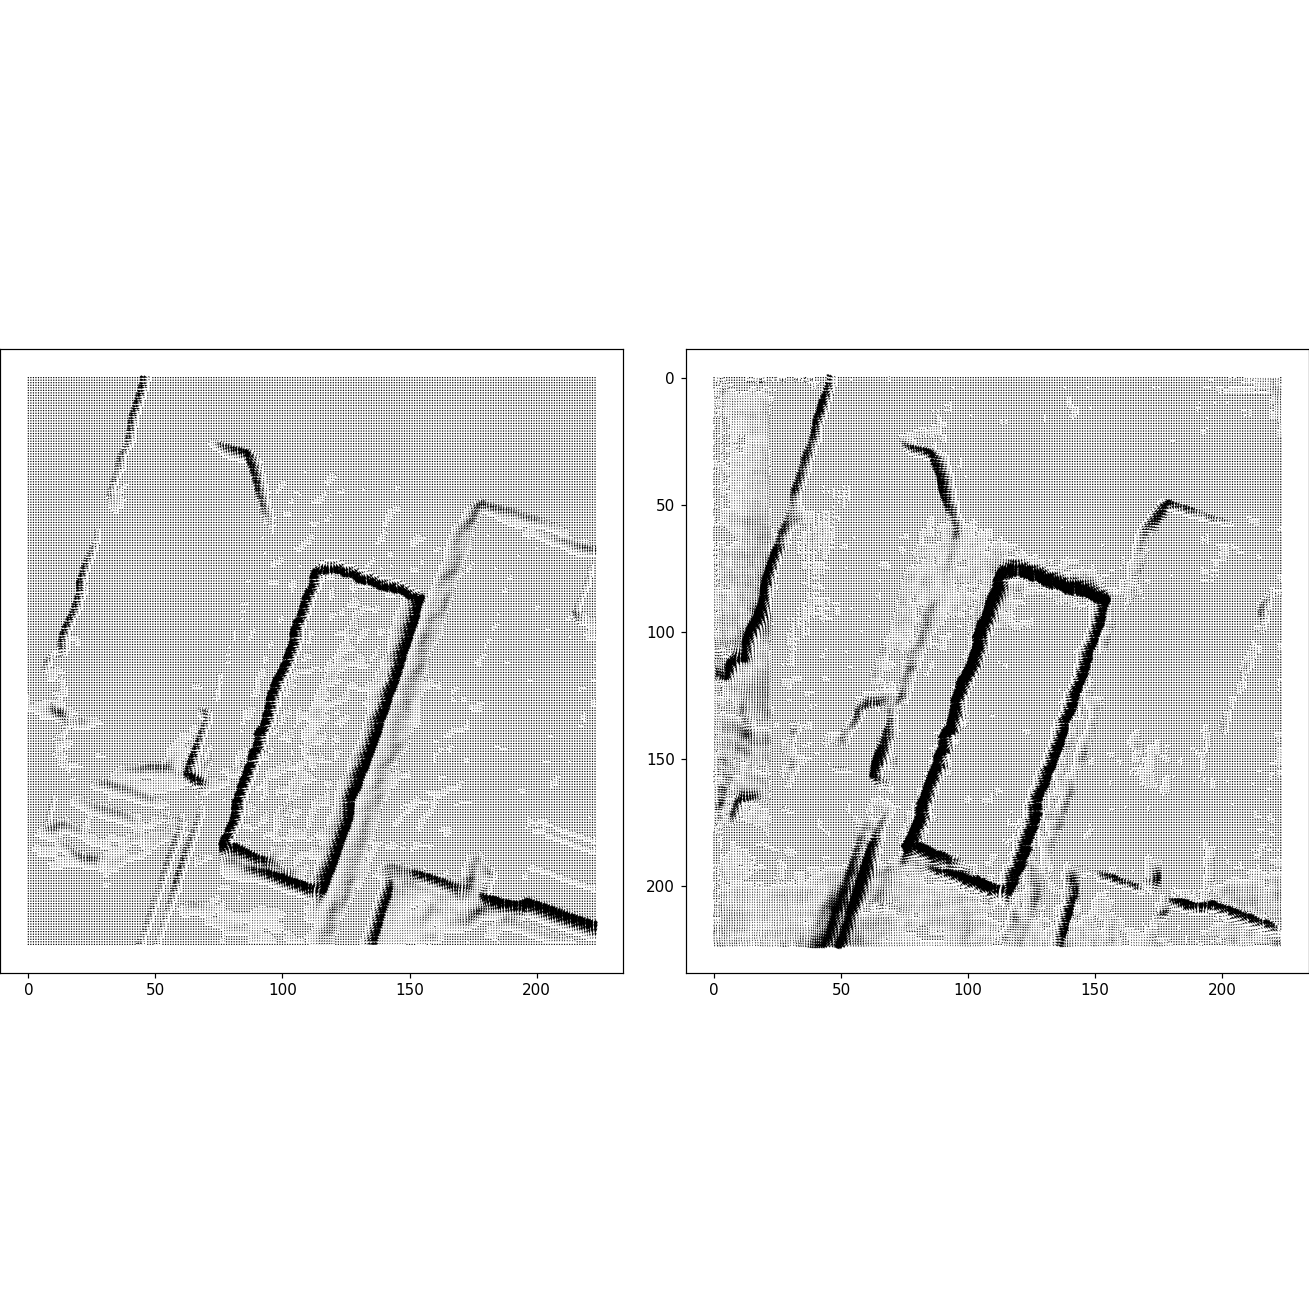

test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.79it/s]
--- EPOCH 113/200 ---
test_batch (Avg. Loss 0.036: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.75it/s]
--- EPOCH 114/200 ---
test_batch (Avg. Loss 0.037: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.78it/s]
--- EPOCH 115/200 ---
test_batch (Avg. Loss 0.039: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.82it/s]
--- EPOCH 116/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.81it/s]
--- EPOCH 117/200 ---
test_batch (Avg. Loss 0.042: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.76it/s]
--- EPOCH 118/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.80it/s]
--- EPOCH 119/200 ---
test_b

<IPython.core.display.Javascript object>


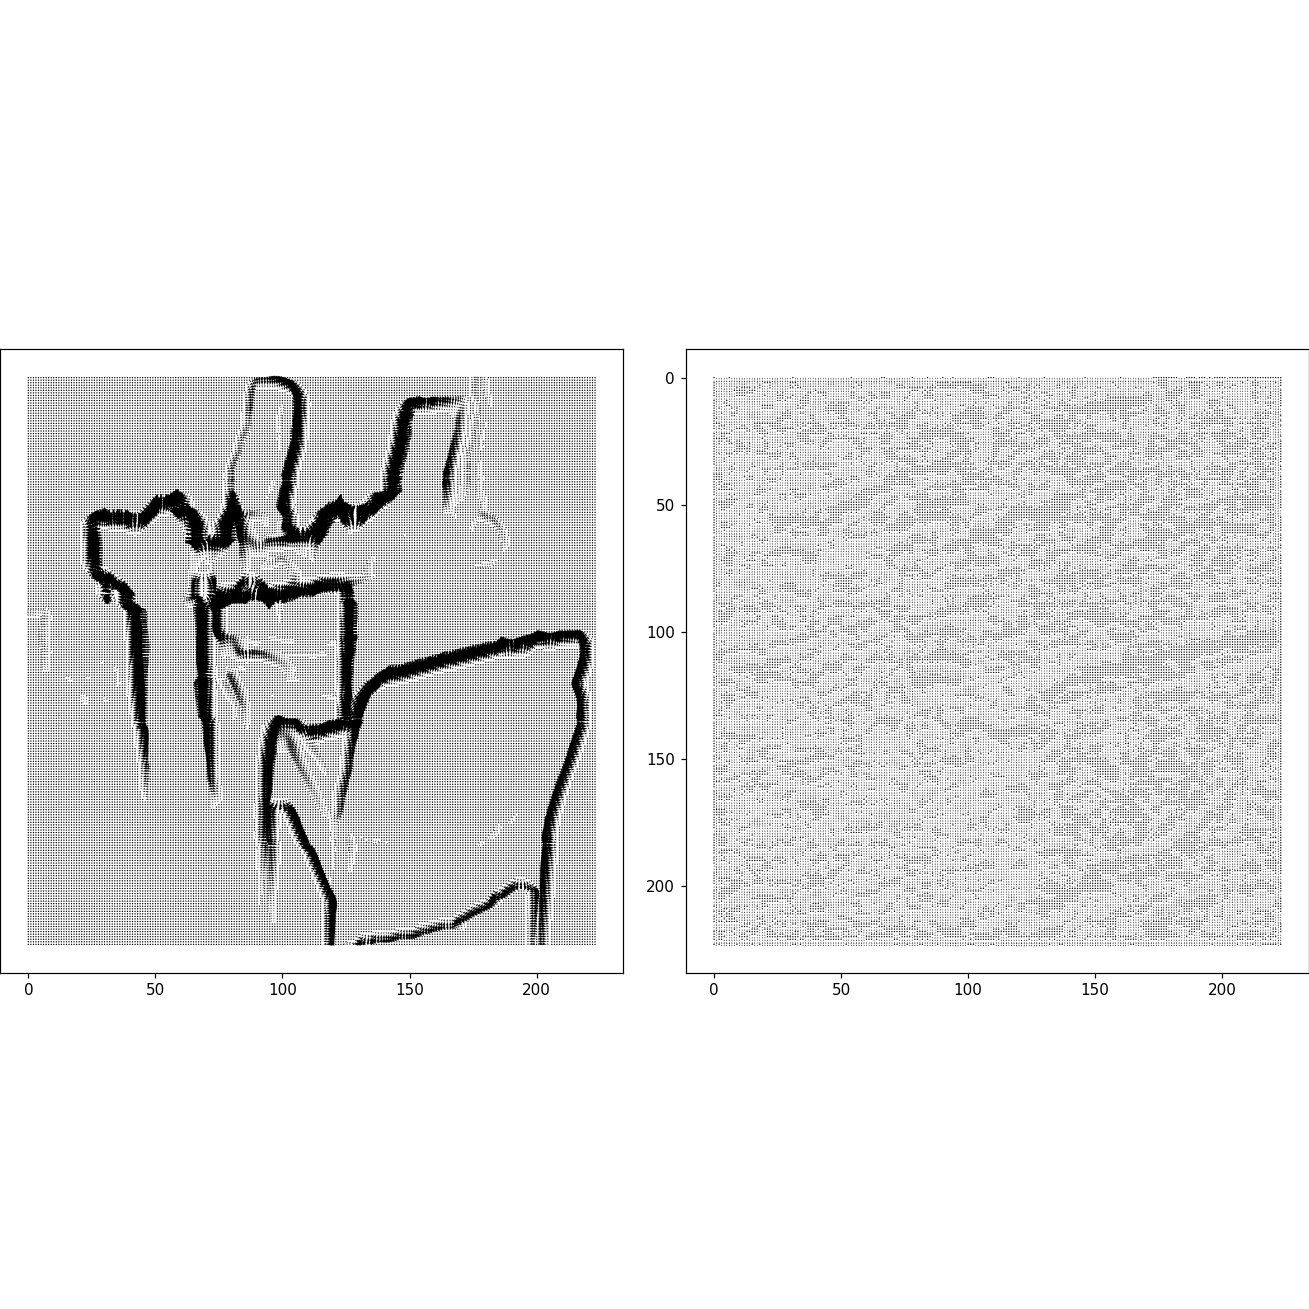

test_batch (Avg. Loss 0.058: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.92it/s]
--- EPOCH 2/200 ---
test_batch (Avg. Loss 0.051: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.96it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=8,betas=0.9,lr=0.001,momentum=0.9.pt at epoch 2
--- EPOCH 3/200 ---
test_batch (Avg. Loss 0.051: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.93it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=8,betas=0.9,lr=0.001,momentum=0.9.pt at epoch 3
--- EPOCH 4/200 ---
test_batch (Avg. Loss 0.051: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.93it/s]
--- EPOCH 5/200 ---
test_batch (Avg. Loss 0.047: 100%|█████████████████████████████████████████████████████|

test_batch (Avg. Loss 0.044: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.96it/s]
--- EPOCH 28/200 ---
test_batch (Avg. Loss 0.044: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.86it/s]
--- EPOCH 29/200 ---
test_batch (Avg. Loss 0.042: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.79it/s]
--- EPOCH 30/200 ---
test_batch (Avg. Loss 0.047: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.77it/s]
--- EPOCH 31/200 ---
test_batch (Avg. Loss 0.049: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.92it/s]
--- EPOCH 32/200 ---
test_batch (Avg. Loss 0.045: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.92it/s]
--- EPOCH 33/200 ---
test_batch (Avg. Loss 0.048: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.94it/s]
--- EPOCH 34/200 ---
test_batch (A

test_batch (Avg. Loss 0.040: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.80it/s]
--- EPOCH 58/200 ---
test_batch (Avg. Loss 0.040: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.84it/s]
--- EPOCH 59/200 ---
test_batch (Avg. Loss 0.041: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.87it/s]
--- EPOCH 60/200 ---
test_batch (Avg. Loss 0.043: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.82it/s]
--- EPOCH 61/200 ---
test_batch (Avg. Loss 0.039: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.86it/s]
--- EPOCH 62/200 ---
test_batch (Avg. Loss 0.043: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.82it/s]
--- EPOCH 63/200 ---
test_batch (Avg. Loss 0.040: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.80it/s]
--- EPOCH 64/200 ---
test_batch (A

test_batch (Avg. Loss 0.042: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.68it/s]
--- EPOCH 88/200 ---
test_batch (Avg. Loss 0.041: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.71it/s]
--- EPOCH 89/200 ---
test_batch (Avg. Loss 0.037: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.69it/s]
--- EPOCH 90/200 ---
test_batch (Avg. Loss 0.034: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.71it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=8,betas=0.9,lr=0.001,momentum=0.9.pt at epoch 90
--- EPOCH 91/200 ---
test_batch (Avg. Loss 0.040: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.89it/s]
--- EPOCH 92/200 ---
test_batch (Avg. Loss 0.035: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.90it/s

test_batch (Avg. Loss 0.037: 100%|█████████████████████████████████████████████████████| 18/18 [00:07<00:00,  2.42it/s]
--- EPOCH 118/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 18/18 [00:07<00:00,  2.44it/s]
--- EPOCH 119/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 18/18 [00:07<00:00,  2.44it/s]
--- EPOCH 120/200 ---
test_batch (Avg. Loss 0.039: 100%|█████████████████████████████████████████████████████| 18/18 [00:07<00:00,  2.50it/s]
--- EPOCH 121/200 ---
test_batch (Avg. Loss 0.040: 100%|█████████████████████████████████████████████████████| 18/18 [00:07<00:00,  2.44it/s]
--- EPOCH 122/200 ---
test_batch (Avg. Loss 0.033: 100%|█████████████████████████████████████████████████████| 18/18 [00:07<00:00,  2.44it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=8,betas=0.9,lr=0.001,momentum=0.9.pt at ep

test_batch (Avg. Loss 0.033: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.92it/s]
--- EPOCH 146/200 ---
test_batch (Avg. Loss 0.033: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.88it/s]
--- EPOCH 147/200 ---
test_batch (Avg. Loss 0.037: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.95it/s]
--- EPOCH 148/200 ---
test_batch (Avg. Loss 0.033: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.96it/s]
--- EPOCH 149/200 ---
test_batch (Avg. Loss 0.034: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.95it/s]
--- EPOCH 150/200 ---
test_batch (Avg. Loss 0.037: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.96it/s]
--- EPOCH 151/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.97it/s]
--- EPOCH 152/200 ---
test_b

[I] - device=cuda
    - seed=42
    - dropout_p=0
    - optimizer=None
    - scheduler=None
[I] - Init SpecialFuseNet
    - warm start=True
    - BN momentum=0.1
    - dropout_p=0
[I] - Initialize Net.
    - Init type=xavier
    - Init gain=0.02

[I] - default optimizer set: SGD(lr=0.001,momentum=0.9,weight_decay=0.0005)
[I] - default scheduler set: StepSR(step_size=1000,gamma=0.1)
[I] - device=cuda
    - seed=42
    - dropout_p=0.4
    - optimizer=None
    - scheduler=None
[I] - Init SpecialFuseNet
    - warm start=True
    - BN momentum=0.1
    - dropout_p=0.4
[I] - Initialize Net.
    - Init type=xavier
    - Init gain=0.02

[I] - default optimizer set: SGD(lr=0.001,momentum=0.9,weight_decay=0.0005)
[I] - default scheduler set: StepSR(step_size=1000,gamma=0.1)
--- EPOCH 1/200 ---
test_batch:   0%|                                                                               | 0/18 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


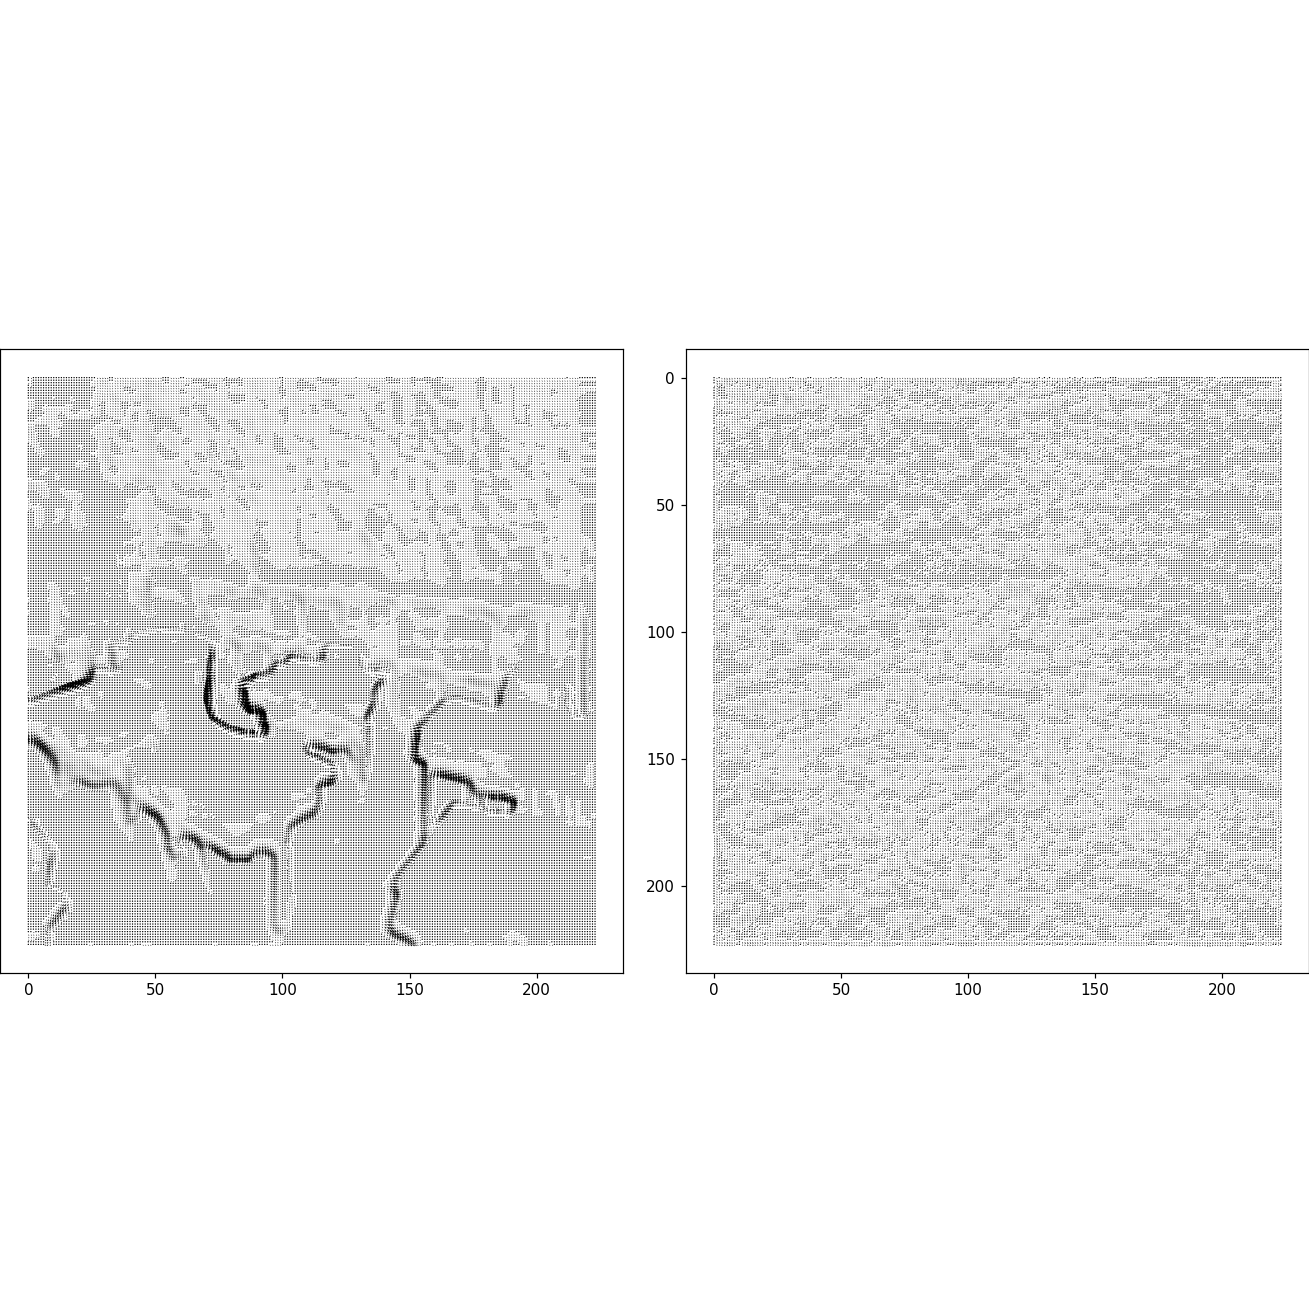

test_batch (Avg. Loss 0.061: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.79it/s]
--- EPOCH 2/200 ---
test_batch (Avg. Loss 0.058: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.81it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=8,betas=0.9,lr=0.01,momentum=0.9.pt at epoch 2
--- EPOCH 3/200 ---
test_batch (Avg. Loss 0.049: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.79it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=8,betas=0.9,lr=0.01,momentum=0.9.pt at epoch 3
--- EPOCH 4/200 ---
test_batch (Avg. Loss 0.054: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.81it/s]
--- EPOCH 5/200 ---
test_batch (Avg. Loss 0.056: 100%|█████████████████████████████████████████████████████| 1

test_batch (Avg. Loss 0.048: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.74it/s]
--- EPOCH 31/200 ---
test_batch (Avg. Loss 0.050: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.76it/s]
--- EPOCH 32/200 ---
test_batch (Avg. Loss 0.051: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.76it/s]
--- EPOCH 33/200 ---
test_batch (Avg. Loss 0.045: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.88it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=8,betas=0.9,lr=0.01,momentum=0.9.pt at epoch 33
--- EPOCH 34/200 ---
test_batch (Avg. Loss 0.052: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.92it/s]
--- EPOCH 35/200 ---
test_batch (Avg. Loss 0.052: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.71it/s]

test_batch (Avg. Loss 0.051: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.72it/s]
--- EPOCH 59/200 ---
test_batch (Avg. Loss 0.050: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.70it/s]
--- EPOCH 60/200 ---
test_batch (Avg. Loss 0.051: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.71it/s]
--- EPOCH 61/200 ---
test_batch (Avg. Loss 0.044: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.72it/s]
--- EPOCH 62/200 ---
test_batch (Avg. Loss 0.048: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.73it/s]
--- EPOCH 63/200 ---
test_batch (Avg. Loss 0.047: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.72it/s]
--- EPOCH 64/200 ---
test_batch (Avg. Loss 0.045: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.72it/s]
--- EPOCH 65/200 ---
test_batch (A

test_batch (Avg. Loss 0.044: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.82it/s]
--- EPOCH 89/200 ---
test_batch (Avg. Loss 0.041: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.80it/s]
--- EPOCH 90/200 ---
test_batch (Avg. Loss 0.041: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.77it/s]
--- EPOCH 91/200 ---
test_batch (Avg. Loss 0.047: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.78it/s]
--- EPOCH 92/200 ---
test_batch (Avg. Loss 0.043: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.82it/s]
--- EPOCH 93/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.71it/s]
[I] - Saved checkpoint C:\Users\tomav\Documents\GitHub\cs236781-project\checkpoints/special_fusenet,img_size=224,224,batch_size=8,betas=0.9,lr=0.01,momentum=0.9.pt at epoch 93

test_batch (Avg. Loss 0.039: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.93it/s]
--- EPOCH 119/200 ---
test_batch (Avg. Loss 0.044: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.93it/s]
--- EPOCH 120/200 ---
test_batch (Avg. Loss 0.044: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.95it/s]
--- EPOCH 121/200 ---
test_batch (Avg. Loss 0.046: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.88it/s]
--- EPOCH 122/200 ---
test_batch (Avg. Loss 0.036: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.94it/s]
--- EPOCH 123/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.95it/s]
--- EPOCH 124/200 ---
test_batch (Avg. Loss 0.040: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.93it/s]
--- EPOCH 125/200 ---
test_b

test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.96it/s]
--- EPOCH 148/200 ---
test_batch (Avg. Loss 0.035: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.95it/s]
--- EPOCH 149/200 ---
test_batch (Avg. Loss 0.039: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.95it/s]
--- EPOCH 150/200 ---
test_batch (Avg. Loss 0.036: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.94it/s]
--- EPOCH 151/200 ---
test_batch (Avg. Loss 0.036: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.91it/s]
--- EPOCH 152/200 ---
test_batch (Avg. Loss 0.037: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.93it/s]
--- EPOCH 153/200 ---
test_batch (Avg. Loss 0.034: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.92it/s]
--- EPOCH 154/200 ---
test_b

test_batch (Avg. Loss 0.035: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.68it/s]
--- EPOCH 179/200 ---
test_batch (Avg. Loss 0.037: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.81it/s]
--- EPOCH 180/200 ---
test_batch (Avg. Loss 0.040: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.90it/s]
--- EPOCH 181/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.89it/s]
--- EPOCH 182/200 ---
test_batch (Avg. Loss 0.036: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.91it/s]
--- EPOCH 183/200 ---
test_batch (Avg. Loss 0.038: 100%|█████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.85it/s]
Finished a combintation training.


In [4]:
all_combintations = list(itertools.product(*[IMAGE_SIZE, TRAIN_TEST_RATIO, BATCH_SIZE, \
                                             NUM_WORKERS, BETAS, LR, MOMENTUM, \
                                             WEIGHT_DECAY, STEP_SIZE, GAMMA, \
                                             NUM_EPOCHS]))
for combintation in all_combintations:
    image_size       = combintation[0]
    train_test_ratio = combintation[1]
    batch_size       = combintation[2]
    num_workers      = combintation[3]
    betas            = combintation[4]
    lr               = combintation[5]
    momentum         = combintation[6]
    weight_decay     = combintation[7]
    step_size        = combintation[8]
    gamma            = combintation[9]
    num_epochs       = combintation[10]
    with open(hyperparameters_filename + '.py', "w") as hyperparameters_file:
        print(f"IMAGE_SIZE={image_size}", file=hyperparameters_file)
        print(f"TRAIN_TEST_RATIO={train_test_ratio}", file=hyperparameters_file)
        print(f"BATCH_SIZE={batch_size}", file=hyperparameters_file)
        print(f"NUM_WORKERS={num_workers}", file=hyperparameters_file)
        print(f"BETAS={betas}", file=hyperparameters_file)
        print(f"LR={lr}", file=hyperparameters_file)
        print(f"MOMENTUM={momentum}", file=hyperparameters_file)
        print(f"WEIGHT_DECAY={weight_decay}", file=hyperparameters_file)
        print(f"STEP_SIZE={step_size}", file=hyperparameters_file)
        print(f"GAMMA={gamma}", file=hyperparameters_file)
        print(f"NUM_EPOCHS={num_epochs}", file=hyperparameters_file)
    print("Current Hyper-Parameters:")
    with open(hyperparameters_filename + '.py', "r") as hyperparameters_file:
        print(hyperparameters_file.read())
    # dl_train,dl_test = rgbd_gradients_dataloader(root=DATASET_DIR, use_transforms=True, overfit_mode=OVERFITTING_TRAINING)
    dl_train, dl_test = rgbd_gradients_dataloader(root=DATASET_DIR,
                                                 batch_size=batch_size,
                                                 num_workers=num_workers,
                                                 train_test_ratio=train_test_ratio,
                                                 image_size=image_size,
                                                 evaluage=True,
                                                 constant_index=constant_index)
    sample_batch     = next(iter(dl_train))
    rgb_size         = tuple(sample_batch['rgb'].shape[1:])
    depth_size       = tuple(sample_batch['depth'].shape[1:])
    grads_size       = tuple(sample_batch['x'].shape[1:])
    train_sample_batch1 = next(iter(dl_train))
    train_sample_batch2 = next(iter(dl_train))
    fusenetmodel = SpecialFuseNetModel(rgb_size=rgb_size,depth_size=depth_size,grads_size=grads_size,
                                       device=device, dropout_p=0)
    xy1 = fusenetmodel(train_sample_batch1['rgb'],train_sample_batch1['depth']).detach()
    xy2 = fusenetmodel(train_sample_batch2['rgb'],train_sample_batch2['depth']).detach()
    # Train
    if OVERFITTING_TRAINING:
        fusenetmodel = SpecialFuseNetModel(rgb_size=rgb_size,depth_size=depth_size,grads_size=grads_size,
                                       device=device, dropout_p=0)
    else:
        fusenetmodel = SpecialFuseNetModel(rgb_size=rgb_size,depth_size=depth_size,grads_size=grads_size,
                                       device=device)
    trainer = FuseNetTrainer(model=fusenetmodel, device=device, num_epochs=num_epochs)
    checkpoint_folder    = 'checkpoints/'
    checkpoint_file_name = make_ckpt_fname(image_size, batch_size, betas, lr, momentum)
    if OVERFITTING_TRAINING:
        checkpoint_file_name += '_overfit'
    checkpoint_file      = os.path.join(CWD, checkpoint_folder, checkpoint_file_name)
    checkpoint_res_file  = os.path.join(CWD, checkpoint_folder, checkpoint_file_name+'_res')
    if os.path.isfile(f'{checkpoint_file}.pt'):
        os.remove(f'{checkpoint_file}.pt')
    if os.path.isfile(f'{checkpoint_res_file}.pt'):
        os.remove(f'{checkpoint_res_file}.pt')
    res = trainer.fit(dl_train, dl_test, constant_index=constant_index, early_stopping=40, print_every=1, checkpoints=checkpoint_file)
    res.save(checkpoint_res_file)
    # Save the current hyper-parameters file next to the current saved model.
#     shutil.move(os.path.join(CWD,hyperparameters_filename+'.py'),
#                 os.path.join(CWD,checkpoint_folder,hyperparameters_filename+'_'+checkpoint_file_name+'.py'))
    copyfile(os.path.join(CWD, hyperparameters_filename + '.py'),
             os.path.join(CWD, checkpoint_folder, checkpoint_file_name + '_' + hyperparameters_filename + '.py'))
    print("Finished a combintation training.")